<a href="https://colab.research.google.com/github/Nrashani/Amazon-Sales-Analysis-Project/blob/RFS-Segmentation/CustomerAnalysis_Nimasha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Analysis by Nimasha
In this Analysis I want to provide recommendation to the busines to increase  customer sales based on the customer behavior data. Not all customers shows equal behaviors. Some  are loyal  cusotmers who often visit to buy automobile from the same company. Some customers require more attention and handholding. And some doesn't come back at all. So, sales person cannot manage all the different customers and if we can different strategies based on each customer persona it will enhance the customer experience and hiigher car sales.
Hence, I am performing a Customer Analysis using RFS Segmentation.

# Business Benefits
 RFS (Recency, Frequency, Spend) segmentation helps businesses to segment customers baseed on their spending habbits.

*   When was the last time they have made a purchase?
*   How often they purchase?
*   How much they spent?

It allows businesses to categorize customers based on their purchasing behavior and craft targeted strategies such as for VIP customers we can introduce car deals or we can send emails about automobile campaigns and new payment plans.


# Loading Data

In [7]:
from google.colab import files

# here I am uploading a .csv file
uploaded = files.upload()


Saving payments.csv to payments.csv


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [51]:
# I am now going to ask Python to read my dataset
df = pd.read_csv('payments.csv')

In [52]:
# This syntax is to check if my dataset is uploaded correctly. Becasue the RFS is based on the customer I wanted a table with columns such as CustomerNumber, payment date and amount.
df.head()

,customerNumber,checkNumber,paymentDate,amount
0,103,HQ336336,2004-10-19,6066.78
1,103,JM555205,2003-06-05,14571.44
2,103,OM314933,2004-12-18,1676.14
3,112,BO864823,2004-12-17,14191.12
4,112,HQ55022,2003-06-06,32641.98


# Data Cleaning
Before proceeding I want to make sure all the columns are in the correct data format such as Integer or date formats. Also need to check there's no empty cells in my dataset.

In [53]:

print(df.isnull().sum())

customerNumber    0
checkNumber       0
paymentDate       0
amount            0
dtype: int64


# Calculating the Recency (When was the las time customer made a puchase?)
When calculating the recency, I need to fix a reference date to check when was the last time customer made a purchase. For example, If business unit in Australia wants to check when was the last time a customer made a puchase as of most recent payment date of the customers base then the reeference date will be the maximum value of the PaymentDate column.

In [54]:
reference_date = df['paymentDate'].max()
print (reference_date)

2005-06-09


In [ ]:
# Formula for the Recency = (2005-06-09) - (2004-12-17)

Before I calculate the Recency for each customer, I need to check if there are duplicate customerNumbers and group each customer's transactions together. For example if CustomerNumber ABC has performed 2 transactions, I need to know when was the last transaction done.

In [55]:
df.groupby('customerNumber')

In [56]:
import pandas as pd
df['paymentDate'] = pd.to_datetime(df['paymentDate'])
reference_date = pd.to_datetime(reference_date)
recency = df.groupby('customerNumber')['paymentDate'].max().reset_index()
recency['Recency'] = reference_date - recency['paymentDate']
recency.head()

,customerNumber,paymentDate,Recency
0,103,2004-12-18,173 days
1,112,2004-12-17,174 days
2,114,2004-12-15,176 days
3,119,2005-02-22,107 days
4,121,2004-11-28,193 days


# Calculating the Frequency of customer purchases

In [57]:
frequency=df.groupby('customerNumber')['paymentDate'].count()
frequency.head(100)

,paymentDate
customerNumber,
103,3
112,3
114,4
119,3
121,4
...,...
486,3
487,2
489,2


# How much customers spent?

In [58]:
Spend=df.groupby('customerNumber')['amount'].sum()
Spend.head(100)

,amount
customerNumber,
103,22314.36
112,80180.98
114,180585.07
119,116949.68
121,104224.79
...,...
486,77726.59
487,42570.37
489,29586.15


# Visualization

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
if 'Recency' in df.columns:
    df.plot(x='customerNumber', y='Recency', kind='scatter')
    plt.show()
else:
    print("Column 'Recency' not found in the DataFrame.")

Column 'Recency' not found in the DataFrame.


Since there's no recency column in the dataframe, I have to add it before creating the plot diagram

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
df['paymentDate'] = pd.to_datetime(df['paymentDate'])
reference_date = pd.to_datetime(reference_date)
recency = df.groupby('customerNumber')['paymentDate'].max().reset_index()
recency['Recency'] = reference_date - recency['paymentDate']
df = pd.merge(df, recency[['customerNumber', 'Recency']], on='customerNumber', how='left')
df.head()


,customerNumber,checkNumber,paymentDate,amount,Recency
0,103,HQ336336,2004-10-19,6066.78,173 days
1,103,JM555205,2003-06-05,14571.44,173 days
2,103,OM314933,2004-12-18,1676.14,173 days
3,112,BO864823,2004-12-17,14191.12,174 days
4,112,HQ55022,2003-06-06,32641.98,174 days


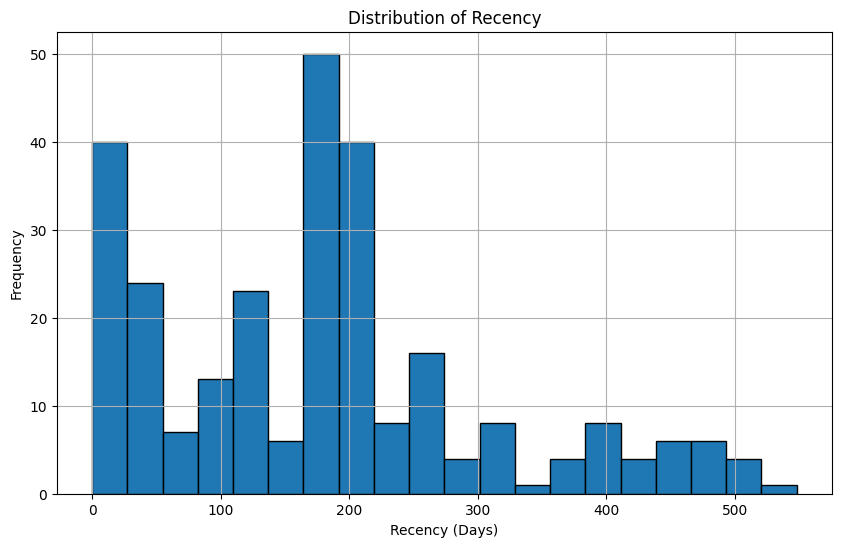

In [67]:
df['Recency'] = df['Recency'].dt.days
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.hist(df['Recency'], bins=20, edgecolor='black')  # Adjust bins as needed
plt.title('Distribution of Recency')
plt.xlabel('Recency (Days)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

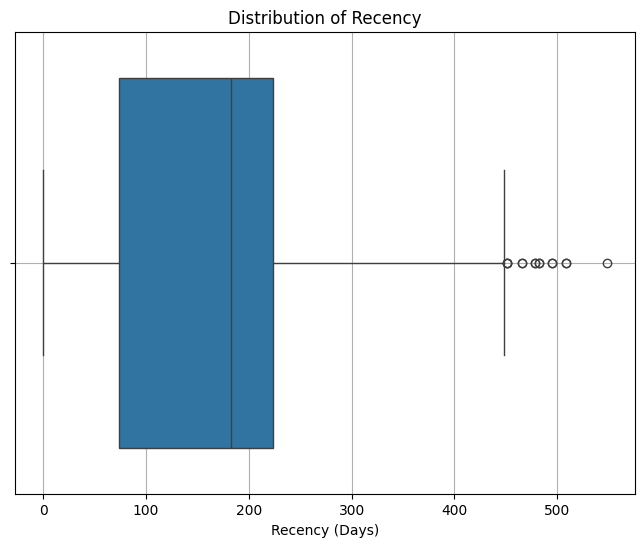

In [68]:
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.boxplot(x=df['Recency'])  # Using seaborn for a more visually appealing box plot
plt.title('Distribution of Recency')
plt.xlabel('Recency (Days)')
plt.grid(True)
plt.show()

<ipython-input-71-de4e507c0dcd>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Recency'], shade=True)


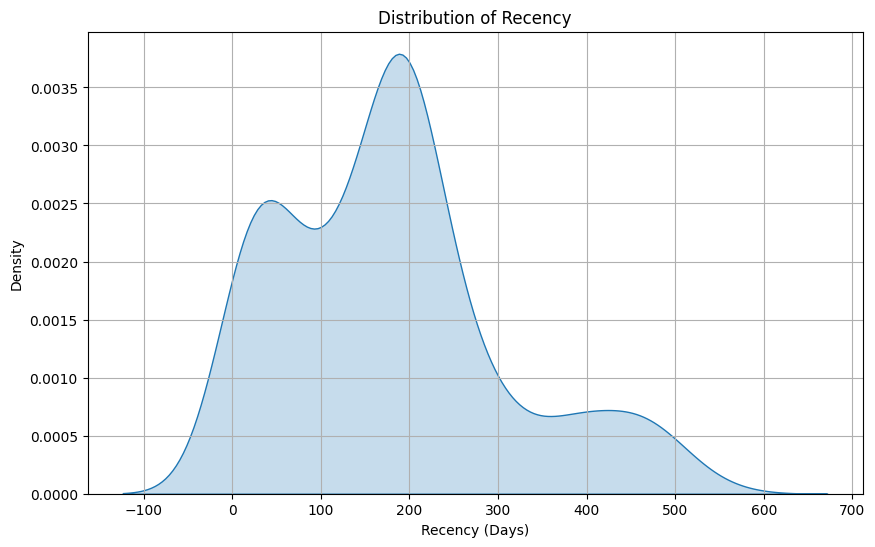

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['paymentDate'] = pd.to_datetime(df['paymentDate'])
reference_date = pd.to_datetime(reference_date)
recency = df.groupby('customerNumber')['paymentDate'].max().reset_index()
recency['Recency'] = reference_date - recency['paymentDate']
df = pd.merge(df, recency[['customerNumber', 'Recency']], on='customerNumber', how='left')

df['Recency'] = df['Recency'].dt.days
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Recency'], shade=True)
plt.title('Distribution of Recency')
plt.xlabel('Recency (Days)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

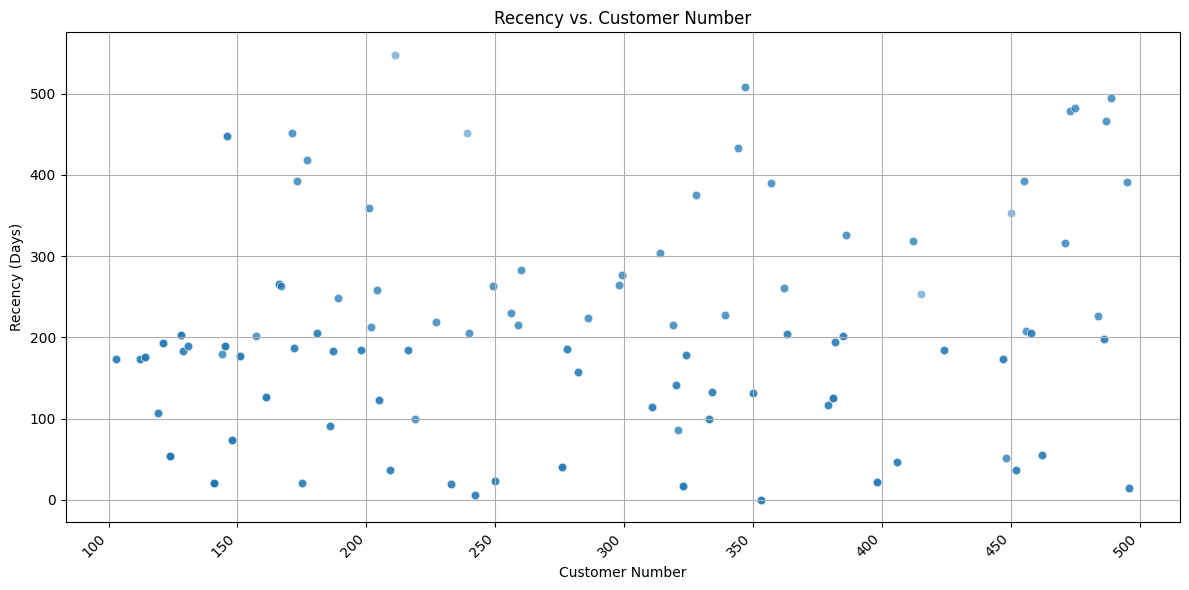

In [72]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['customerNumber'], y=df['Recency'], alpha=0.5)
plt.title('Recency vs. Customer Number')
plt.xlabel('Customer Number')
plt.ylabel('Recency (Days)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [92]:
import pandas as pd
import plotly.express as px
recency_over_time = df.groupby(pd.Grouper(key='paymentDate', freq='M'))['Recency'].mean().reset_index()  # Group by month
fig = px.line(recency_over_time, x='paymentDate', y='Recency', title='Average Recency Over Time')
fig.update_xaxes(title_text='Payment Date')
fig.update_yaxes(title_text='Average Recency (Days)')
fig.show()

<ipython-input-92-f04c8761d525>:3: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



Now, I want to create a dashboard colliating all the diagrams

In [107]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

df['paymentDate'] = pd.to_datetime(df['paymentDate'])
reference_date = pd.to_datetime(reference_date)
recency = df.groupby('customerNumber')['paymentDate'].max().reset_index()
recency['Recency'] = reference_date - recency['paymentDate']

max_recency = df['Recency'].max()
avg_recency = df['Recency'].mean()


# Group by payment date and calculate average recency for the line chart
recency_over_time = df.groupby(pd.Grouper(key='paymentDate', freq='ME'))['Recency'].mean().reset_index()
# Convert 'Recency' column to numeric days instead of using .dt

fig = make_subplots(rows=2, cols=2, subplot_titles=("Histogram", "Box Plot", "Scatter Plot", "Avg Recency Over Time"))

# Histogram
fig.add_trace(go.Histogram(x=df['Recency'], nbinsx=20), row=1, col=1)

# Box Plot
fig.add_trace(go.Box(x=df['Recency']), row=1, col=2)

# Scatter Plot
fig.add_trace(go.Scatter(x=df['customerNumber'], y=df['Recency'], mode='markers', marker=dict(opacity=0.5)), row=2, col=1)

# Add trace for the line chart
# Update row and col to 2, 2 for correct placement
fig.add_trace(go.Scatter(x=recency_over_time['paymentDate'], y=recency_over_time['Recency'], mode='lines'), row=2, col=2)


fig.add_annotation(
    x=df.loc[df['Recency'] == max_recency, 'customerNumber'].iloc[0],  # X-coordinate of max recency
    y=max_recency,  # Y-coordinate of max recency
    text=f"Max Recency: {max_recency} days",  # Annotation text
    showarrow=True,  # Show arrow pointing to the point
    arrowhead=7,  # Arrowhead style
    ax=0,  # X-offset of arrow
    ay=-40,  # Y-offset of arrow
    row=2,  # Subplot row
    col=1  # Subplot column
)

# Add annotation for average recency
fig.add_annotation(
    x=df['customerNumber'].max(),  # Place annotation near the end of x-axis
    y=avg_recency,  # Y-coordinate of average recency
    text=f"Avg Recency: {avg_recency:.2f} days",  # Annotation text (formatted to 2 decimal places)
    showarrow=False,  # No arrow needed for average
    font=dict(color="red"),  # Change annotation color for distinction
    row=2,  # Subplot row
    col=1  # Subplot column
)

fig.update_layout(height=1500, width=1500, title_text="Recency Analysis Dashboard")
fig.update_xaxes(title_text="Recency (Days)", row=1, col=1)
fig.update_xaxes(title_text="Recency (Days)", row=1, col=2)
fig.update_xaxes(title_text="Customer Number", row=2, col=1)
fig.update_xaxes(title_text="Payment Date", row=2, col=2)
fig.update_yaxes(title_text="Frequency", row=1, col=1)
